![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# <a name="0">Machine Learning Accelerator - Tabular Data - Lecture 1</a>

## Data Processing

### Sample Problem: Detecting Products with Electrical Plugs in Amazon Marketplace Products

In this [Jupiter notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) (*), we explore an Amazonian dataset. In some marketplaces, ASINs having electrical plugs need to be accompanied by a compliance form. Thus it is desirable to identify ASINs with an electrical plug.

1. <a href="#1">Read the dataset</a>

2. <a href="#2">Exploratory data analysis (EDA)</a>
    * <a href="#21">Overall Statistics</a>
    * <a href="#22">Univariate Statistics: Basic Plots</a>
    * <a href="#23">Multivariate Statistics: Scatter Plots and Correlations</a>
    
    
3. <a href="#3">Train - Validation - Test Datasets </a>

4. <a href="#4">Handling Imbalanced Datasets</a>

5. <a href="#5">Handling Missing Values</a>
    * <a href="#51">Drop columns with missing values</a>
    * <a href="#52">Drop rows with missing values</a>
    * <a href="#53"> Impute missing values with .fillna()</a>
    * <a href="#54"> Impute missing values with sklearn's SimpleImputer</a> (preferred)
    
    
    
__Data schema:__ 
- __ASIN__: Product ASIN
- __target_label:__ Binary field with values in {0,1}. A value of 1 show ASIN has a plug, otherwise 0.
- __ASIN_STATIC_ITEM_NAME:__ Title of the ASIN.
- __ASIN_STATIC_PRODUCT_DESCRIPTION:__ Description of the ASIN
- __ASIN_STATIC_GL_PRODUCT_GROUP_TYPE:__ GL information for the ASIN.
- __ASIN_STATIC_ITEM_PACKAGE_WEIGHT:__ Weight of the ASIN.
- __ASIN_STATIC_LIST_PRICE:__ Price information for the ASIN.
- __ASIN_STATIC_BATTERIES_INCLUDED:__ Information whether batteries are included along with the product.
- __ASIN_STATIC_BATTERIES_REQUIRED:__ Information whether batteries are required for using the product.
- __ASIN_STATIC_ITEM_CLASSIFICATION:__ Item classification of whether it is a standalone or bundle parent item etc

(*) __Jupiter notebooks environment__: 
* [Jupiter notebooks](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) allow creating and sharing documents that contain both code and rich text element, such as equations. 
* This is a quick-start demo to bring you up to speed on coding and experimenting with machine learning. Move through the notebook from top to bottom. Run each code cell to see its output. To run a cell, click within the cell and press __Shift__+__Enter__, or click __Run__ at the top of the page. 

Let's upgrade our libraries.

In [1]:
# Upgrade dependencies
! pip install -q pip==21.3.1
! pip install -q pandas==1.1.5
! pip install -q scikit-learn==0.23.2
! pip install -q matplotlib==3.3.4
! pip install -q numpy==1.19.5

## 1. <a name="1">Read the datasets</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('../../data/review/asin_electrical_plug_training_data.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (55109, 10)


## 2. <a name="2">Exploratory Data Analysis</a>
(<a href="#0">Go to top</a>)

### 2.1 <a name="21">Overall Statistics</a>
(<a href="#2">Go to Exploratory Data Analysis</a>)

We look at number of rows, columns, and some simple statistics of the dataset.

In [3]:
# Print the first five rows
# NaN means missing data
df.head(5)

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_PRODUCT_DESCRIPTION,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE,ASIN_STATIC_BATTERIES_INCLUDED,ASIN_STATIC_BATTERIES_REQUIRED,ASIN_STATIC_ITEM_CLASSIFICATION
0,B000816IUC,0,Bruder 02921 Jeep Wrangler Unlimited with Hors...,NEW! Jeep Wrangler by Bruder with trailer come...,gl_toy,3.450000,36.66,False,False,base_product
1,B003674A1Y,0,"Lucky Reptile OV-2 OpenAir Vivarium, Medium",Größe: 40x40x60 cm. <p>Lucky Reptile OpenAir V...,gl_pet_products,2.690000,24.68,False,False,base_product
2,B007ECONV4,0,"Klarfit KS5DG Chin Up Bar (150kg Max Load, Doo...",<p><b>Highly flexible pull-up bar with six con...,gl_sports,8.112928,NaN,False,False,base_product
3,B00D89465A,0,Liverpool FC Stripe Wallpaper,This fantastic Liverpool Wallpaper is ideal fo...,gl_home,1.763680,8.33,NaN,NaN,base_product
4,B001MJ0BN4,0,Rolson 68889 Oil Tanned Double Tool Pouch,"Eleven pockets, two fixed metal hammer holders...",gl_biss,2.733704,27.38,NaN,NaN,base_product


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55109 entries, 0 to 55108
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ASIN                               55109 non-null  object 
 1   target_label                       55109 non-null  int64  
 2   ASIN_STATIC_ITEM_NAME              55109 non-null  object 
 3   ASIN_STATIC_PRODUCT_DESCRIPTION    31727 non-null  object 
 4   ASIN_STATIC_GL_PRODUCT_GROUP_TYPE  55109 non-null  object 
 5   ASIN_STATIC_ITEM_PACKAGE_WEIGHT    55027 non-null  float64
 6   ASIN_STATIC_LIST_PRICE             41182 non-null  float64
 7   ASIN_STATIC_BATTERIES_INCLUDED     45016 non-null  object 
 8   ASIN_STATIC_BATTERIES_REQUIRED     40688 non-null  object 
 9   ASIN_STATIC_ITEM_CLASSIFICATION    55097 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.2+ MB


In [5]:
# This prints basic statistics for numerical columns
df.describe()

,target_label,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE
count,55109.000000,55027.000000,4.118200e+04
mean,0.036618,31.130529,1.563334e+02
std,0.187825,458.771422,1.754345e+04
min,0.000000,0.000000,1.160000e+00
25%,0.000000,1.520000,1.667000e+01
50%,0.000000,2.513244,3.268500e+01
75%,0.000000,5.555592,6.999000e+01
max,1.000000,29500.000000,3.560000e+06


Let's choose the model features and the model target. We first print the dataset column labels. One way to print all columns when working with much large datasets, is to use the popular package for scientific computing with Python [numpy](https://numpy.org/) to set printing options. 

In [6]:
import numpy as np                    # use this for datasets with more columns, to print all columns
np.set_printoptions(threshold=np.inf) # use this for datasets with more columns, to print all columns

# This prints the column labels of the dataframe
print(df.columns.values)

['ASIN' 'target_label' 'ASIN_STATIC_ITEM_NAME'
 'ASIN_STATIC_PRODUCT_DESCRIPTION' 'ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'
 'ASIN_STATIC_ITEM_PACKAGE_WEIGHT' 'ASIN_STATIC_LIST_PRICE'
 'ASIN_STATIC_BATTERIES_INCLUDED' 'ASIN_STATIC_BATTERIES_REQUIRED'
 'ASIN_STATIC_ITEM_CLASSIFICATION']


In [7]:
model_features = df.columns.drop('target_label')
model_target = 'target_label'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['ASIN', 'ASIN_STATIC_ITEM_NAME', 'ASIN_STATIC_PRODUCT_DESCRIPTION',
       'ASIN_STATIC_GL_PRODUCT_GROUP_TYPE', 'ASIN_STATIC_ITEM_PACKAGE_WEIGHT',
       'ASIN_STATIC_LIST_PRICE', 'ASIN_STATIC_BATTERIES_INCLUDED',
       'ASIN_STATIC_BATTERIES_REQUIRED', 'ASIN_STATIC_ITEM_CLASSIFICATION'],
      dtype='object')
Model target:  target_label


### 2.2. <a name="22">Basic Plots</a>
(<a href="#2">Go to Exploratory Data Analysis</a>)

We further examine our dataset with some plots, using data visualization libraries like [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/). Important note: These plots ignore null (missing) values. We will see how to deal with <a href="#5">missing values</a> later.

### Bar Plots

Bar plots show counts of categorical data fields. We next examine some of the categorical variables, including the target.

__value_counts()__ function yields the counts of each unique value. 

In [8]:
df['ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'].value_counts()

gl_home                        14581
gl_home_improvement             6278
gl_sports                       5263
gl_toy                          4955
gl_automotive                   3979
gl_pet_products                 3891
gl_office_product               2884
gl_lawn_and_garden              2494
gl_musical_instruments          1786
gl_pc                           1667
gl_camera                       1629
gl_electronics                  1314
gl_baby_product                 1236
gl_drugstore                     757
gl_wireless                      581
gl_kitchen                       566
gl_personal_care_appliances      566
gl_biss                          225
gl_major_appliances              213
gl_home_entertainment            107
gl_apparel                        55
gl_luggage                        29
gl_shoes                          22
gl_beauty                         17
gl_video_games                     7
gl_book                            3
gl_watch                           2
g

__plot.bar()__ addition to the __value_counts()__ function makes a bar plot of the values.

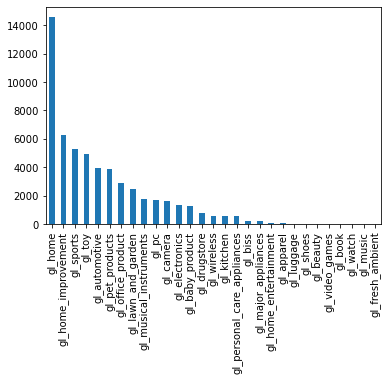

In [9]:
import matplotlib.pyplot as plt

df['ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'].value_counts().plot.bar()
plt.show()

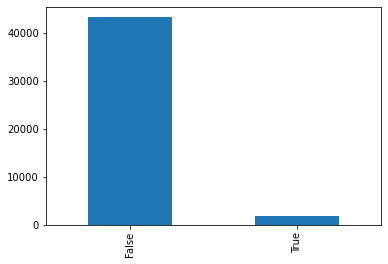

In [10]:
df['ASIN_STATIC_BATTERIES_INCLUDED'].value_counts().plot.bar()
plt.show()

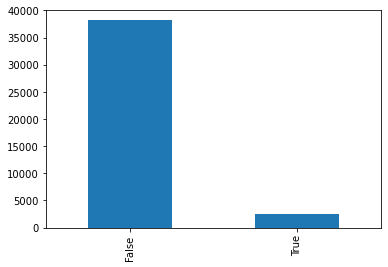

In [11]:
df['ASIN_STATIC_BATTERIES_REQUIRED'].value_counts().plot.bar()
plt.show()

#### Target distribution

Let's also check our target distribution.

In [12]:
df[model_target].value_counts()

0    53091
1     2018
Name: target_label, dtype: int64

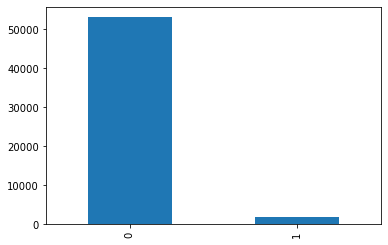

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()


We notice that we are dealing with an imbalanced dataset. This means one result type is dominating the other one(s). In this case, we have a lot of class 0 ("no plug") records and very few class 1 ("plug") records. One way to <a href="#4">address the imbalanced dataset</a> is upsampling the rare the class, but other scenarios might be considered.


### Histograms

Histograms show distributions of numeric data fields. Data is divided into "buckets" or "bins".

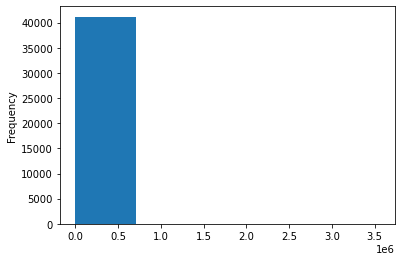

In [14]:
df['ASIN_STATIC_LIST_PRICE'].plot.hist(bins=5)
plt.show()

When we look at the histogram above, we can see that values are heavily placed in the first bin. Let's check the min-max values below.

In [15]:
df['ASIN_STATIC_LIST_PRICE'].min()

1.16

In [16]:
df['ASIN_STATIC_LIST_PRICE'].max()

3560000.0

__value_counts()__ function again becomes useful here. Let's increase the number of bins to 10 for more bins. Looking below, we can see that we have an outlier number in the last bin. We have a very expensive item of worth more than __3 million $__! 

This is likely a wrong value. We next drop this record.

In [17]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-3558.84, 356001.044]        41181
(356001.044, 712000.928]          0
(712000.928, 1068000.812]         0
(1068000.812, 1424000.696]        0
(1424000.696, 1780000.58]         0
(1780000.58, 2136000.464]         0
(2136000.464, 2492000.348]        0
(2492000.348, 2848000.232]        0
(2848000.232, 3204000.116]        0
(3204000.116, 3560000.0]          1
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

In [18]:
dropIndexes = df[df['ASIN_STATIC_LIST_PRICE'] > 3000000].index
df.drop(dropIndexes , inplace=True)

In [19]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-13.838999999999999, 1500.944]    41147
(1500.944, 3000.728]                  15
(3000.728, 4500.512]                   8
(4500.512, 6000.296]                   3
(6000.296, 7500.08]                    2
(7500.08, 8999.864]                    3
(8999.864, 10499.648]                  0
(10499.648, 11999.432]                 1
(11999.432, 13499.216]                 0
(13499.216, 14999.0]                   2
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

Let's look at the histogram again, to see the values spread out across more bins.

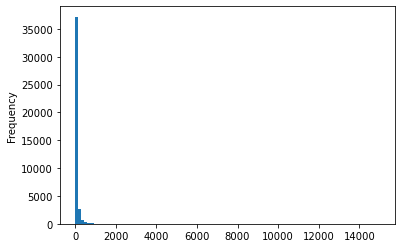

In [20]:
df['ASIN_STATIC_LIST_PRICE'].plot.hist(bins=100)
plt.show()

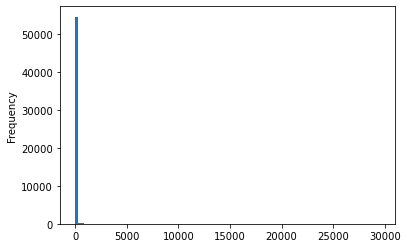

In [21]:
df['ASIN_STATIC_ITEM_PACKAGE_WEIGHT'].plot.hist(bins=100)
plt.show()

In [22]:
df['ASIN_STATIC_ITEM_PACKAGE_WEIGHT'].value_counts(bins=5, sort=False)

(-29.501, 5900.0]     54959
(5900.0, 11800.0]        47
(11800.0, 17700.0]       15
(17700.0, 23600.0]        1
(23600.0, 29500.0]        4
Name: ASIN_STATIC_ITEM_PACKAGE_WEIGHT, dtype: int64

### 2.3 <a name="23">Scatter Plots and Correlations</a>
(<a href="#2">Go to Exploratory Data Analysis</a>)

### Scatter plot
Scatter plots are simple 2D plots of two numerical variables that can be used to examine the relationship between two variables. Below, we are plotting __ASIN_STATIC_ITEM_PACKAGE_WEIGHT__ vs. __ASIN_STATIC_LIST_PRICE__. 

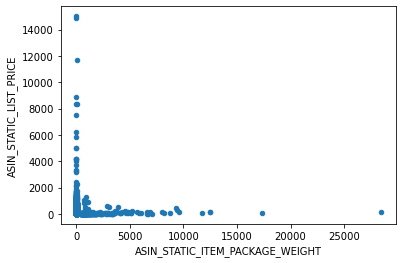

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot.scatter(x='ASIN_STATIC_ITEM_PACKAGE_WEIGHT', y='ASIN_STATIC_LIST_PRICE')
plt.show()

From this scatter plot, we cannot identify a relationship between these two variables. 

### Scatterplot with Identification

We can also add the target values, "Plug" or "No plug", to our scatter plot.

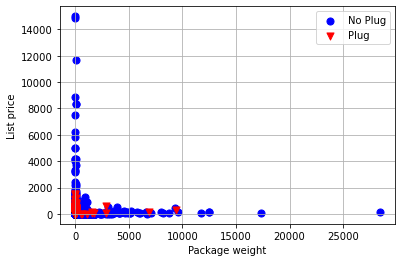

In [24]:
import seaborn as sns

X1 = df[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']][df['target_label'] == 0]
X2 = df[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']][df['target_label'] == 1]

plt.scatter(X1.iloc[:,0], 
            X1.iloc[:,1], 
            s=50, 
            c='blue', 
            marker='o', 
            label='No Plug')

plt.scatter(X2.iloc[:,0], 
            X2.iloc[:,1], 
            s=50, 
            c='red', 
            marker='v', 
            label='Plug')

plt.xlabel('Package weight')
plt.ylabel('List price')
plt.legend()
plt.grid()
plt.show()

From this plot, we notice that we can't get a good separation between the data points, based on these two numerical features alone. 

### Correlation Matrix Heatmat
We can also  print correlation matrices. Correlation scores are calculated for numerical fields. For that reason, we will only pick the numerical fields of our dataset: __ASIN_STATIC_ITEM_PACKAGE_WEIGHT__ and __ASIN_STATIC_LIST_PRICE__.

In [25]:
cols = ['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']
#print(df[cols].corr())
df[cols].corr().style.background_gradient(cmap='tab20c')

,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE
ASIN_STATIC_ITEM_PACKAGE_WEIGHT,1.000000,0.013237
ASIN_STATIC_LIST_PRICE,0.013237,1.000000


From the correlation matrix, we can see that there is no relationship between listing price and item package weight.

## 3. <a name="3">Train - Validation - Test Datasets</a>
(<a href="#0">Go to top</a>)

We have already split the original dataset into two data files: __training__ data file (asin_electrical_plug_training_data.csv) with __90%__ of the samples and the __test__ data file (asin_electrical_plug_test_data.csv) with the remaining __10%__. 

In [26]:
# Load the test_dataset from csv file
test_data = pd.read_csv('../../data/review/asin_electrical_plug_test_data.csv')

print('The shape of the test dataset is:', test_data.shape)

The shape of the test dataset is: (6124, 10)


To optimize the performance of our models, that is to reduce the so-called *generalization gap* for example, we need a __validation__ set. 
We can further split our training dataset (df) to create a new training set (85%) and a validation set (15%) using sklearn's [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [27]:
# Split training dataset into training and val datasets
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(df, test_size=0.15, shuffle=True, random_state=23)


In [28]:
# Print the shapes of the Train - Validation - Test Datasets
print('Train - Validation - Test Datasets shapes: ', train_data.shape, val_data.shape, test_data.shape)


Train - Validation - Test Datasets shapes:  (46841, 10) (8267, 10) (6124, 10)


## 4. <a name="4">Handling Imbalanced Datasets</a>
(<a href="#0">Go to top</a>)

__Up-sampling__. One way to address imbalanced datasets, more specifically target imbalance, is to upsample the rare class, so in the end we have equal number of samples for each class.

__Important note:__ We want to fix the imbalance only in training set. We shouldn't change the validation and test sets, they should follow the original distribution.

In [29]:
# Print the shapes of the Train - Validation - Test Datasets
print('Train - Validation - Test Datasets shapes: ', train_data.shape, val_data.shape, test_data.shape)

# Print the distribution of target for the training dataset
print('Train Dataset class 0 samples: ', sum(train_data[model_target] == 0))
print('Train Dataset class 1 samples: ', sum(train_data[model_target] == 1))

Train - Validation - Test Datasets shapes:  (46841, 10) (8267, 10) (6124, 10)
Train Dataset class 0 samples:  45091
Train Dataset class 1 samples:  1750


In [30]:
# Upsample the rare class 
from sklearn.utils import shuffle

plug_products = train_data[train_data[model_target] == 1]
no_plug_products = train_data[train_data[model_target] == 0]

upsampled_plug_products = plug_products.sample(n=len(no_plug_products), replace=True, random_state=42)

train_data = pd.concat([no_plug_products, upsampled_plug_products])
train_data = shuffle(train_data)

In [31]:
# Print the shapes of the Train - Validation - Test Datasets
print('Train - Validation - Test Datasets shapes: ', train_data.shape, val_data.shape, test_data.shape)

# Print the distribution of target for the training dataset
print('Train Dataset class 0 samples: ', sum(train_data[model_target] == 0))
print('Train Dataset class 1 samples: ', sum(train_data[model_target] == 1))

Train - Validation - Test Datasets shapes:  (90182, 10) (8267, 10) (6124, 10)
Train Dataset class 0 samples:  45091
Train Dataset class 1 samples:  45091


## 5. <a name="5">Handling Missing Values</a>
(<a href="#0">Go to top</a>)

  * <a href="#51">Drop columns with missing values</a>
  * <a href="#52">Drop rows with missing values</a>
  * <a href="#53"> Impute missing values with .fillna()</a>
  * <a href="#54"> Impute missing values with sklearn's SimpleImputer</a> (preferred)

Let's first check the number of missing (nan) values for each column.

In [32]:
df.isna().sum()

ASIN                                     0
target_label                             0
ASIN_STATIC_ITEM_NAME                    0
ASIN_STATIC_PRODUCT_DESCRIPTION      23382
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE        0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT         82
ASIN_STATIC_LIST_PRICE               13927
ASIN_STATIC_BATTERIES_INCLUDED       10093
ASIN_STATIC_BATTERIES_REQUIRED       14421
ASIN_STATIC_ITEM_CLASSIFICATION         12
dtype: int64

There are quite a few values missing on many columns, of both numerical and categorical types. Let's explore a few options dealing with missing values.

### 5.1 <a name="51">Drop columns with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

We can drop some columns if we think there is significant amount of missing data in those columns.

__Hint:__ You can also use __inplace=True__ parameter to drop columns inplace without assignment.


In [33]:
df_columns_dropped = df.drop(columns = ["ASIN_STATIC_PRODUCT_DESCRIPTION", 
                                        "ASIN_STATIC_LIST_PRICE",
                                        "ASIN_STATIC_BATTERIES_INCLUDED",
                                        "ASIN_STATIC_BATTERIES_REQUIRED"
                                       ])  
df_columns_dropped.head()

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_ITEM_CLASSIFICATION
0,B000816IUC,0,Bruder 02921 Jeep Wrangler Unlimited with Hors...,gl_toy,3.450000,base_product
1,B003674A1Y,0,"Lucky Reptile OV-2 OpenAir Vivarium, Medium",gl_pet_products,2.690000,base_product
2,B007ECONV4,0,"Klarfit KS5DG Chin Up Bar (150kg Max Load, Doo...",gl_sports,8.112928,base_product
3,B00D89465A,0,Liverpool FC Stripe Wallpaper,gl_home,1.763680,base_product
4,B001MJ0BN4,0,Rolson 68889 Oil Tanned Double Tool Pouch,gl_biss,2.733704,base_product


In [34]:
df_columns_dropped.isna().sum()

ASIN                                  0
target_label                          0
ASIN_STATIC_ITEM_NAME                 0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE     0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      82
ASIN_STATIC_ITEM_CLASSIFICATION      12
dtype: int64

In [35]:
df_columns_dropped.shape

(55108, 6)

Note the reduced size of the dataset features, from 10 to 6. This can sometimes lead to underfitting models -- not having enough features to build a good model able to capture the pattern in the dataset, especially when dropping features that are essential to the task at hand. 

### 5.2 <a name="52">Drop rows with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

Here, we simply drop rows that have at least one missing value. There are other drop options to explore, depending on specific problems.

In [36]:
df_missing_dropped = df.dropna()

Let's check the missing values below.

In [37]:
df_missing_dropped.isna().sum()

ASIN                                 0
target_label                         0
ASIN_STATIC_ITEM_NAME                0
ASIN_STATIC_PRODUCT_DESCRIPTION      0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      0
ASIN_STATIC_LIST_PRICE               0
ASIN_STATIC_BATTERIES_INCLUDED       0
ASIN_STATIC_BATTERIES_REQUIRED       0
ASIN_STATIC_ITEM_CLASSIFICATION      0
dtype: int64

In [38]:
df_missing_dropped.shape

(18190, 10)

The number of data samples reduced dramatically. This can sometimes lead to overfitting models -- especially when the number of features is greater or comparable to the number of data samples. 

### 5.3 <a name="53">Impute missing values with .fillna()</a>
(<a href="#5">Go to Handling Missing Values</a>)

__Imputing Numerical Values:__ The easiest way to impute numerical values is to get the __average (mean) value__ for the corresponding column and use that as the new value for each missing record in that column. There are other imputations options to explore, depending on specific problems.

In [39]:
# Impute our two numerical features by using the mean per feature to replace the nans
numerical_features = ["ASIN_STATIC_ITEM_PACKAGE_WEIGHT", "ASIN_STATIC_LIST_PRICE"]

# Assign our df to a new df 
df_imputed = df.copy()
print(df_imputed[numerical_features].isna().sum())

# Impute our two numerical features with the means. 
df_imputed[numerical_features] = df_imputed[numerical_features].fillna(df_imputed[numerical_features].mean())

print(df_imputed[numerical_features].isna().sum())

ASIN_STATIC_ITEM_PACKAGE_WEIGHT       82
ASIN_STATIC_LIST_PRICE             13927
dtype: int64
ASIN_STATIC_ITEM_PACKAGE_WEIGHT    0
ASIN_STATIC_LIST_PRICE             0
dtype: int64


__Imputing Categorical Values:__ We can impute categorical values by getting the most common (mode) value for the corresponding column and use that as the new value for each missing record in that column. 

In [40]:
# Impute two categorical features by using the mode per feature to replace the nans
categorical_features_0 = ["ASIN_STATIC_BATTERIES_INCLUDED", "ASIN_STATIC_BATTERIES_REQUIRED"]

# Assign our df to a new df 
df_imputed_c = df.copy()
print(df_imputed_c[categorical_features_0].isna().sum())

# Find the mode per each feature
mode_impute = df_imputed_c[categorical_features_0].mode()
print(mode_impute)

# Impute our two categorical features with the computed. 
# "inplace=True" parameter replaces missing values in place (no need for left handside assignment)
df_imputed_c["ASIN_STATIC_BATTERIES_INCLUDED"].fillna(False, inplace = True)
df_imputed_c["ASIN_STATIC_BATTERIES_REQUIRED"].fillna(False, inplace = True)

print(df_imputed_c[categorical_features_0].isna().sum())

ASIN_STATIC_BATTERIES_INCLUDED    10093
ASIN_STATIC_BATTERIES_REQUIRED    14421
dtype: int64
  ASIN_STATIC_BATTERIES_INCLUDED ASIN_STATIC_BATTERIES_REQUIRED
0                          False                          False
ASIN_STATIC_BATTERIES_INCLUDED    0
ASIN_STATIC_BATTERIES_REQUIRED    0
dtype: int64


We can also create a new category, such as "Missing", for selected categorical features.

In [41]:
# Impute two categorical features by using the mode per feature to replace the nans
categorical_features = ["ASIN_STATIC_BATTERIES_INCLUDED", 
                  "ASIN_STATIC_BATTERIES_REQUIRED",
                  "ASIN_STATIC_PRODUCT_DESCRIPTION", 
                  "ASIN_STATIC_ITEM_CLASSIFICATION"]

print(df_imputed[categorical_features].isna().sum())

# Impute our categorical features with a new category named "Missing". 
df_imputed[categorical_features] = df_imputed[categorical_features].fillna("Missing")

print(df_imputed[categorical_features].isna().sum())


ASIN_STATIC_BATTERIES_INCLUDED     10093
ASIN_STATIC_BATTERIES_REQUIRED     14421
ASIN_STATIC_PRODUCT_DESCRIPTION    23382
ASIN_STATIC_ITEM_CLASSIFICATION       12
dtype: int64
ASIN_STATIC_BATTERIES_INCLUDED     0
ASIN_STATIC_BATTERIES_REQUIRED     0
ASIN_STATIC_PRODUCT_DESCRIPTION    0
ASIN_STATIC_ITEM_CLASSIFICATION    0
dtype: int64


Let's check again on missing values.

In [42]:
df_imputed.isna().sum()

ASIN                                 0
target_label                         0
ASIN_STATIC_ITEM_NAME                0
ASIN_STATIC_PRODUCT_DESCRIPTION      0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      0
ASIN_STATIC_LIST_PRICE               0
ASIN_STATIC_BATTERIES_INCLUDED       0
ASIN_STATIC_BATTERIES_REQUIRED       0
ASIN_STATIC_ITEM_CLASSIFICATION      0
dtype: int64

### 5.4 <a name="54">Impute missing values with sklearn's __SimpleImputer__</a> (Preferred)
(<a href="#5">Go to Handling Missing Values</a>)

A more elegant way to implement imputation is leveraging data preprocessing tools from [sklearn](https://scikit-learn.org/stable/), a popular Machine Learning library. Let's use the [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) from sklearn, a class implementing __.fit()__ and __.transform()__ methods.


In [43]:
# Impute our two numerical columns by using the mean per column to replace the nans
numerical_features = ["ASIN_STATIC_ITEM_PACKAGE_WEIGHT", "ASIN_STATIC_LIST_PRICE"]

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputed = df.copy()
print(df_sklearn_imputed[numerical_features].isna().sum())

imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed[numerical_features] = imputer.fit_transform(df_sklearn_imputed[numerical_features])

print(df_sklearn_imputed[numerical_features].isna().sum())

ASIN_STATIC_ITEM_PACKAGE_WEIGHT       82
ASIN_STATIC_LIST_PRICE             13927
dtype: int64
ASIN_STATIC_ITEM_PACKAGE_WEIGHT    0
ASIN_STATIC_LIST_PRICE             0
dtype: int64


In [44]:
# Impute two categorical columns by using the mode per column to replace the nans
categorical_features_0 = ["ASIN_STATIC_BATTERIES_INCLUDED", "ASIN_STATIC_BATTERIES_REQUIRED"]

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[categorical_features_0].isna().sum())

imputer = SimpleImputer(strategy='most_frequent')
df_sklearn_imputer[categorical_features_0] = imputer.fit_transform(df_sklearn_imputer[categorical_features_0])

print(df_sklearn_imputer[categorical_features_0].isna().sum())

ASIN_STATIC_BATTERIES_INCLUDED    10093
ASIN_STATIC_BATTERIES_REQUIRED    14421
dtype: int64
ASIN_STATIC_BATTERIES_INCLUDED    0
ASIN_STATIC_BATTERIES_REQUIRED    0
dtype: int64


In [45]:
# Impute categorical columns by using a placeholder "Missing"
categorical_features = ["ASIN_STATIC_BATTERIES_INCLUDED", 
                  "ASIN_STATIC_BATTERIES_REQUIRED",
                  "ASIN_STATIC_PRODUCT_DESCRIPTION", 
                  "ASIN_STATIC_ITEM_CLASSIFICATION"]

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[categorical_features].isna().sum())

imputer = SimpleImputer(strategy='constant', fill_value = "Missing")
df_sklearn_imputer[categorical_features] = imputer.fit_transform(df_sklearn_imputer[categorical_features])

print(df_sklearn_imputer[categorical_features].isna().sum())

ASIN_STATIC_BATTERIES_INCLUDED     10093
ASIN_STATIC_BATTERIES_REQUIRED     14421
ASIN_STATIC_PRODUCT_DESCRIPTION    23382
ASIN_STATIC_ITEM_CLASSIFICATION       12
dtype: int64
ASIN_STATIC_BATTERIES_INCLUDED     0
ASIN_STATIC_BATTERIES_REQUIRED     0
ASIN_STATIC_PRODUCT_DESCRIPTION    0
ASIN_STATIC_ITEM_CLASSIFICATION    0
dtype: int64
